<a href="https://colab.research.google.com/github/43pratik/ML_lab/blob/main/Prac_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    body_weight  brain_weight max_life_span gestation_time  predation_index  \
0      6654.000        5712.0          38.6            645                3   
1         1.000           6.6           4.5             42                3   
2         3.385          44.5            14             60                1   
3         0.920           5.7             ?             25                5   
4      2547.000        4603.0            69            624                3   
..          ...           ...           ...            ...              ...   
57        2.000          12.3           7.5            200                3   
58        0.104           2.5           2.3             46                3   
59        4.190          58.0            24            210                4   
60        3.500           3.9             3             14                2   
61        4.050          17.0            13             38                3   

    sleep_exposure_index  danger_index total_sleep 

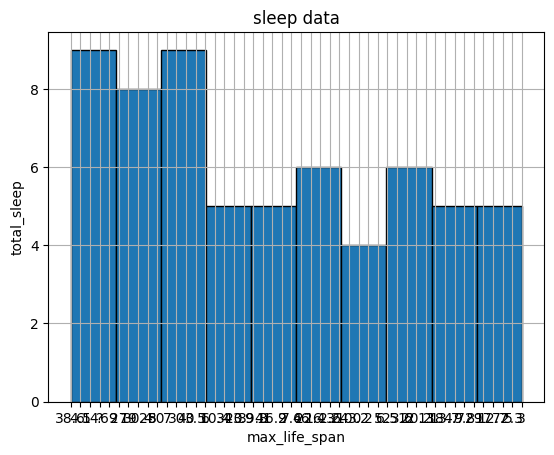

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

df = pd.read_csv('/content/dataset_2191_sleep.csv')
print(df)

df['max_life_span'].hist(bins=10, edgecolor='black')
plt.title('sleep data')
plt.xlabel('max_life_span')
plt.ylabel('total_sleep')
plt.show()




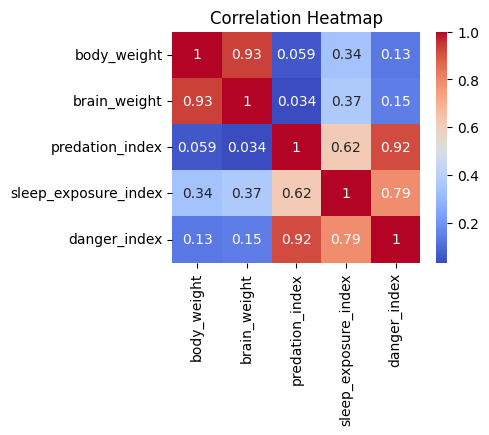

In [12]:

plt.figure(figsize=(4, 3))

numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()